<a href="https://colab.research.google.com/github/BANELE-MTHEMBU/Assignment_One/blob/main/Practice_for_test_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
a=("banele")
print(a[2::])

nele


In [42]:
def add(x,y):
  results =x+y
  return results

x=int(input('Enter the xalue for x: '))
y=int(input('Enter the value for y: '))
print(add(x,y))

Enter the xalue for x: 2
Enter the value for y: 4
6


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import random

a=np.array([[1 ,2],[4 ,5]])
print(a[0:1],a[1:1])

[[1 2]] []


In [72]:
a = np.array( [ [0,1,2], [3, 4, 5] ] )
print(a[1:2])
 #a[0], a[1][3]

[[3 4 5]]


In [78]:
a='the Banele is going to passmm '
a.split()
print(a.capitalize())

The banele is going to passmm 


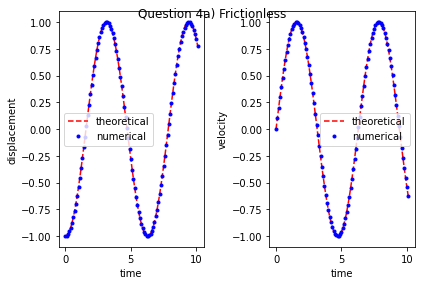

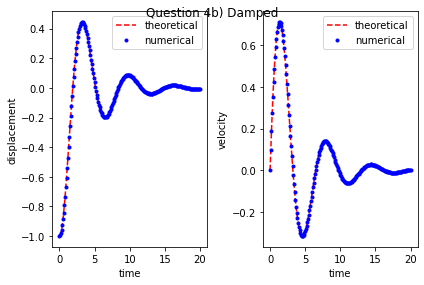

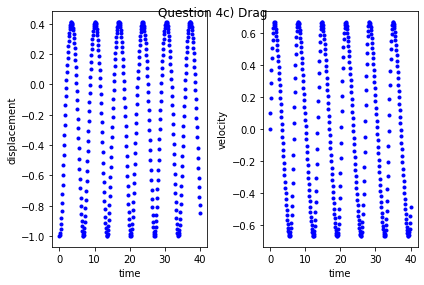

In [79]:
import numpy as np
import matplotlib.pyplot as plt


kappa = 1
gamma = 0.5
eta = 1

# dx/dt = v and 1/2 dv/dt= -kappa*x
def dudt_a(u, t = 0):
    return np.array([u[1],-kappa*u[0]])

# dx/dt = v and 1/2 dv/dt= -kappa*x -gamma v
def dudt_b(u, t = 0):
    return np.array([u[1],-kappa*u[0]-gamma*u[1]])

# dx/dt = v and 1/2 dv/dt= -kappa*x - eta v^2
def dudt_c(u, t = 0):
    return np.array([u[1],-kappa*u[0]-eta*u[1]**2]) 
    # Mistake in the question, drag force shoudl have been proportional to v^2 but always apposing the motion
    # As long and v^2 appeared you would recieve a mark
    #return np.array([u[1],-kappa*u[0]-eta*u[1]*np.abs(u[1])])


def RK4(h,f,t_n,u_n):
    k1 = h*f(u_n,      t_n)
    k2 = h*f(u_n+k1/2, t_n+h/2)
    k3 = h*f(u_n+k2/2, t_n+h/2)
    k4 = h*f(u_n+k3,   t_n+h)
    
    return u_n+1/6*(k1+2*k2+2*k3+k4)


# Question 1a)
# intial conditions
t_n = 0
u_n = np.array([-1,0])
h = 0.1

u = []
u.append(u_n)
t = []
t.append(t_n)

# loop until max time and keeping track of all u_n (position and velcoity) at times t_n
while t_n < 10:
    
    # Question 4a)
    u_n = RK4(h,dudt_a,t_n,u_n)

    t_n = t_n + h
    
    u.append(u_n)
    t.append(t_n)
   
u = np.asarray(u)
t = np.asarray(t)

# Theoretical curve
phi_0 = np.arctan2(u[0,1],-np.sqrt(kappa)*u[0,0])
x_th = u[0,0]/np.cos(phi_0)*np.cos(np.sqrt(kappa)*t+phi_0)
v_th = -np.sqrt(kappa)*u[0,0]/np.cos(phi_0)*np.sin(np.sqrt(kappa)*t+phi_0)


fig = plt.figure()
fig.suptitle('Question 4a) Frictionless')
ax = fig.subplots(1, 2)
ax[0].plot(t,x_th,'--r',label='theoretical')
ax[0].plot(t,u[:,0],'.b',label='numerical')
ax[0].set_xlabel('time')
ax[0].set_ylabel('displacement')
ax[0].legend()

ax[1].plot(t,v_th,'--r',label='theoretical')
ax[1].plot(t,u[:,1],'.b',label='numerical')
ax[1].set_xlabel('time')
ax[1].set_ylabel('velocity')
ax[1].legend()

plt.tight_layout()


#################################

# Question 1b)

t_n = 0
u_n = np.array([-1,0])
h = 0.1

u = []
u.append(u_n)
t = []
t.append(t_n)

while t_n < 20:
    u_n = RK4(h,dudt_b,t_n,u_n)
    t_n = t_n + h
    
    u.append(u_n)
    t.append(t_n)
   
u = np.asarray(u)
t = np.asarray(t)

# Theoretical curve
phi_0 = np.arctan2(-gamma/2-u[0,1]/u[0,0],np.sqrt(kappa-gamma**2/4))
x_th = u[0,0]/np.cos(phi_0)*np.exp(-gamma/2*t)*np.cos(np.sqrt(kappa-gamma**2/4)*t+phi_0)
v_th = -gamma/2*u[0,0]/np.cos(phi_0)*np.exp(-gamma/2*t)*np.cos(np.sqrt(kappa-gamma**2/4)*t+phi_0)\
    - np.sqrt(kappa-gamma**2/4)*u[0,0]/np.cos(phi_0)*np.exp(-gamma/2*t)*np.sin(np.sqrt(kappa-gamma**2/4)*t+phi_0)

fig = plt.figure()
fig.suptitle('Question 4b) Damped')
ax = fig.subplots(1, 2)
ax[0].plot(t,x_th,'--r',label='theoretical')
ax[0].plot(t,u[:,0],'.b',label='numerical')
ax[0].set_xlabel('time')
ax[0].set_ylabel('displacement')
ax[0].legend()

ax[1].plot(t,v_th,'--r',label='theoretical')
ax[1].plot(t,u[:,1],'.b',label='numerical')
ax[1].set_xlabel('time')
ax[1].set_ylabel('velocity')
ax[1].legend()
plt.tight_layout()


#################################


# Question 1c)

t_n = 0
u_n = np.array([-1,0])
h = 0.1

u = []
u.append(u_n)
t = []
t.append(t_n)

while t_n < 40:
    u_n = RK4(h,dudt_c,t_n,u_n)
    t_n = t_n + h
    
    u.append(u_n)
    t.append(t_n)
   
u = np.asarray(u)
t = np.asarray(t)

fig = plt.figure()
fig.suptitle('Question 4c) Drag')
ax = fig.subplots(1, 2)
ax[0].plot(t,u[:,0],'.b',label='numerical')
ax[0].set_xlabel('time')
ax[0].set_ylabel('displacement')

ax[1].plot(t,u[:,1],'.b',label='numerical')
ax[1].set_xlabel('time')
ax[1].set_ylabel('velocity')


plt.tight_layout()